<a href="https://colab.research.google.com/github/Whiteomi/Examen1/blob/main/Lastmile_delivery_operations_mit_lift_lab_serving_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerias requeridas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as  plt

In [ ]:
#Cargar archivo csv desde seaborn
from google.colab import files 
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice 
data = pd.read_csv('lastmile_delivery_operations_mit_lift_lab_serving_customer.csv')
data.head(5)

In [ ]:
#Identificar valores nulos por columna 
valores_nulos=data.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered             10
picture_ca

Métodos para sustituir valores nulos 

In [ ]:
#Sustituir valores nulos por un str en concreto 
data["picture_cargo_being_delivered"]= data["picture_cargo_being_delivered"].fillna("sin_fuente")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str. Se sustituyo por la palabra "sin_fuente". 

In [ ]:
#Identificar valores nulos por columna 
valores_nulos=data.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered              0
picture_ca

In [ ]:
#Sustituir valores nulos por valores no nulos hacia adelante "forward fill" ("ffill")
#Filtro por columnas 
data["picture_cargo_being_delivered_captions"]=data["picture_cargo_being_delivered_captions"].fillna(method="ffill")
#En este apartado se utilizo la sustitución de valores nulos por valores no nulos hacía adelante "forward", rellenando los valores nulos con los str que se encuentran adelante del valor nulo.

In [ ]:
#Identificar valores nulos por columna 
valores_nulos=data.isnull().sum()
valores_nulos

_child_record_id                           0
_record_id                                 0
_parent_id                                 0
_title                                     0
_version                                   0
_created_at                                0
_updated_at                                0
_created_by                                0
_updated_by                                0
_index                                     0
_geometry                                  0
_latitude                                  0
_longitude                                 0
_changeset_id                              0
_created_duration                          0
_updated_duration                          0
_edited_duration                           0
name_of_the_store                          0
entering_the_store                         0
number_of_customers_in_store               0
number_of_suppliers_in_store               0
picture_cargo_being_delivered              0
picture_ca

In [ ]:
#Sustituir valores nulos por un str en concreto 
data["picture_cargo_being_delivered_urls"]= data["picture_cargo_being_delivered_urls"].fillna("no_existe_fuente")
#Este método llamado valores por un str en concreto se utilizo para la sustitución de valores nulos en el apartado de 300_did_not_find, ya que son valores de tipo str. Se sustituyo por la palabra "no_existe_fuente". 

In [ ]:
#Identificar valores nulos por columna 
valores_nulos=data.isnull().sum()
valores_nulos

_child_record_id                          0
_record_id                                0
_parent_id                                0
_title                                    0
_version                                  0
_created_at                               0
_updated_at                               0
_created_by                               0
_updated_by                               0
_index                                    0
_geometry                                 0
_latitude                                 0
_longitude                                0
_changeset_id                             0
_created_duration                         0
_updated_duration                         0
_edited_duration                          0
name_of_the_store                         0
entering_the_store                        0
number_of_customers_in_store              0
number_of_suppliers_in_store              0
picture_cargo_being_delivered             0
picture_cargo_being_delivered_ca

In [ ]:
#Corroboramos valores nulos 
valores_nulos=data.isnull().sum().sum()
valores_nulos

0

Métodos para sustituir outliers

<Figure size 1080x576 with 0 Axes>

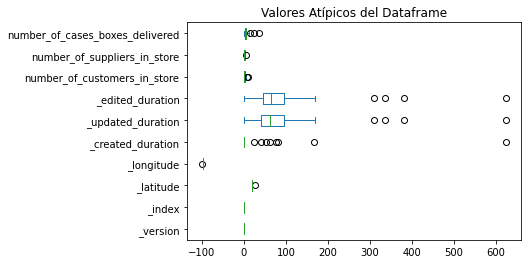

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe 
fig = plt.figure(figsize =(15, 8))
data.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Dibujamos el diagrama

Método de IQR ( Rango Inter Quartilico ) Para este caso se realizo el método de aplicar cuartiles, y así encontrar los outliers y obtener datos limpios y para comprobar se realizo el diagrama de bigote. Se utilizo este metodo ya que son valores numericos los que se encuentran como outliers.

In [ ]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["number_of_cases_boxes_delivered"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr =percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 12.0
Limite inferior permitido -4.0


In [ ]:
#Encomntramos Ouliers 
ouliers_iqr=data[(y>Limite_Superior_iqr) | (y<Limite_Inferior_iqr)]
ouliers_iqr

In [ ]:
#Obtenemos datos limpios 
data_clean_iqr=data[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data_clean_iqr

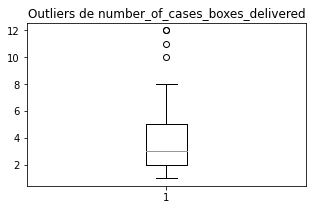

In [ ]:
#Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["number_of_cases_boxes_delivered"])
plt.title("Outliers de number_of_cases_boxes_delivered")
plt.show() # Dibujamos el diagrama

Método de IQR ( Rango Inter Quartilico ) Para este caso se realizo el método de aplicar cuartiles, y así encontrar los outliers y obtener datos limpios y para comprobar se realizo el diagrama de bigote. Se utilizo este metodo ya que son valores numericos los que se encuentran como outliers.

In [ ]:
#Realizamos una copia del dataframe 
data= data_clean_iqr.copy()

In [ ]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["number_of_suppliers_in_store"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr =percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 3.5
Limite inferior permitido -0.5


In [ ]:
#Encomntramos Ouliers 
ouliers_iqr=data[(y>Limite_Superior_iqr) | (y<Limite_Inferior_iqr)]
ouliers_iqr

In [ ]:
#Obtenemos datos limpios 
data_clean_iqr=data[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data_clean_iqr

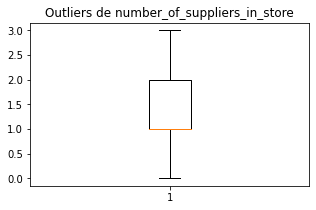

In [ ]:
#Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["number_of_suppliers_in_store"])
plt.title("Outliers de number_of_suppliers_in_store")
plt.show() # Dibujamos el diagrama

Método de IQR ( Rango Inter Quartilico ) Para este caso se realizo el método de aplicar cuartiles, y así encontrar los outliers y obtener datos limpios y para comprobar se realizo el diagrama de bigote. Se utilizo este metodo ya que son valores numericos los que se encuentran como outliers.

In [ ]:
#Realizamos una copia del dataframe 
data= data_clean_iqr.copy()

In [ ]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["number_of_customers_in_store"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr =percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 6.25
Limite inferior permitido -3.75


In [ ]:
#Encomntramos Ouliers 
ouliers_iqr=data[(y>Limite_Superior_iqr) | (y<Limite_Inferior_iqr)]
ouliers_iqr

In [ ]:
#Obtenemos datos limpios 
data_clean_iqr=data[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data_clean_iqr

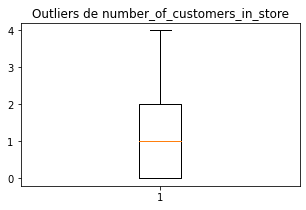

In [ ]:
#Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["number_of_customers_in_store"])
plt.title("Outliers de number_of_customers_in_store")
plt.show() # Dibujamos el diagrama

Método de IQR ( Rango Inter Quartilico ) Para este caso se realizo el método de aplicar cuartiles, y así encontrar los outliers y obtener datos limpios y para comprobar se realizo el diagrama de bigote. Se utilizo este metodo ya que son valores numericos los que se encuentran como outliers.

In [ ]:
#Realizamos una copia del dataframe 
data= data_clean_iqr.copy()

In [ ]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["_edited_duration"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr =percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 178.0
Limite inferior permitido -38.0


In [ ]:
#Encomntramos Ouliers 
ouliers_iqr=data[(y>Limite_Superior_iqr) | (y<Limite_Inferior_iqr)]
ouliers_iqr

In [ ]:
#Obtenemos datos limpios 
data_clean_iqr=data[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data_clean_iqr

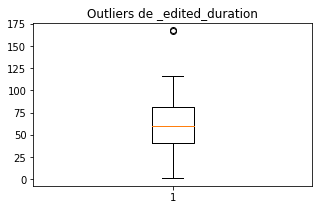

In [ ]:
#Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["_edited_duration"])
plt.title("Outliers de _edited_duration")
plt.show() # Dibujamos el diagrama

Método de IQR ( Rango Inter Quartilico ) Para este caso se realizo el método de aplicar cuartiles, y así encontrar los outliers y obtener datos limpios y para comprobar se realizo el diagrama de bigote. Se utilizo este metodo ya que son valores numericos los que se encuentran como outliers.

In [ ]:
#Realizamos una copia del dataframe 
data= data_clean_iqr.copy()

In [ ]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["_updated_duration"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr =percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 133.5
Limite inferior permitido -14.5


In [ ]:
#Encomntramos Ouliers 
ouliers_iqr=data[(y>Limite_Superior_iqr) | (y<Limite_Inferior_iqr)]
ouliers_iqr

In [ ]:
#Obtenemos datos limpios 
data_clean_iqr=data[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data_clean_iqr

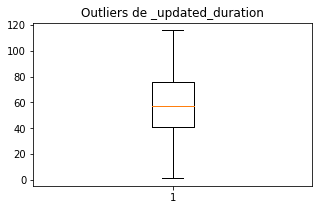

In [ ]:
#Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["_updated_duration"])
plt.title("Outliers de _updated_duration")
plt.show() # Dibujamos el diagrama

Método de IQR ( Rango Inter Quartilico ) Para este caso se realizo el método de aplicar cuartiles, y así encontrar los outliers y obtener datos limpios y para comprobar se realizo el diagrama de bigote. Se utilizo este metodo ya que son valores numericos los que se encuentran como outliers.

In [ ]:
#Realizamos una copia del dataframe 
data= data_clean_iqr.copy()

In [ ]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["_created_duration"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr =percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 0.0
Limite inferior permitido 0.0


In [ ]:
#Encomntramos Ouliers 
ouliers_iqr=data[(y>Limite_Superior_iqr) | (y<Limite_Inferior_iqr)]
ouliers_iqr

In [ ]:
#Obtenemos datos limpios 
data_clean_iqr=data[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data_clean_iqr

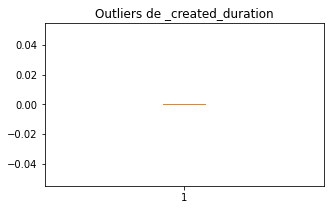

In [ ]:
#Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["_created_duration"])
plt.title("Outliers de _created_duration")
plt.show() # Dibujamos el diagrama

Descargamos DataFrame 

In [57]:
#Convertir DataFrame a CSV 
data.to_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer_sin_nulos.csv")

In [58]:
#Descargar archivo filtrado en csv 
from google.colab import files 

files.download("lastmile_delivery_operations_mit_lift_lab_serving_customer_sin_nulos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>